# Homework 5 - Part 1

The aim of this exercise is to create two word clouds, one with the raw data and another one with pre-processing apply first. We end up this part by comparing the results and saying some pros and cons of both.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

from wordcloud import WordCloud

In this part we only need one csv file.

In [2]:
df_Emails = pd.read_csv('hillary-clinton-emails/Emails.csv')

After exploring a bit the data, we decide to take the 'RawText' and not the 'ExtractedBodyText' for the simple reason that the extraction often does not go well: the body text is NaN or only a part of the ful body.

In [3]:
df_Emails.head(3)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...


In [4]:
# nltk.download() # uncomment this line if need to install some packages 
# we make sure those are installed:
# punkt - for English tokens
# stopwords - no comment
# wordnet - for lemmatizer
# ...

## First word cloud, with raw data

Let's first create a word cloud with the raw data chosen above and see what we get.

In [5]:
mails = df_Emails.RawText

In [6]:
# We group up all the mails in a single string
text = ""
for mail in mails:
    text += " " + mail

In [7]:
wc = WordCloud().generate(text)

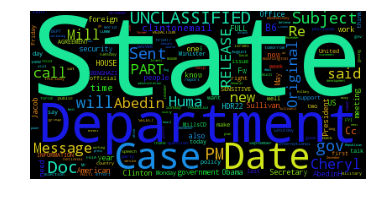

In [8]:
plt.imshow(wc)
plt.axis("off")
plt.show()

Although the results is not that bad, we can observe some useless words popping out here and there. We are definitely not interested by the "Subject:" in each mail or words like "PART", "Cc", etc. With that in mind we can start thinking about how to pre-processing for the second word cloud.

## Second word cloud, with pre-processing

Let's now apply some pre-processing to our mails and see how it goes. We will apply:
- Cleaning (like get rid of the '\n'...)
- Tokenization
- Stop-words
- (Stems - not interesting here because we want to see existing words, not just stems)
- Lemmatizer (instead of stems, give a result we are more interested in).


To perform a decent cleaning, we take another look at the data. We notice that very often, added text contain something like below:

    #UNCLASSIFIED
    #U.S. Department of State
    #Case No. F-2015-04841
    #Doc No. C05739546
    #Date: 05/13/2015
    #STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
    #SUBJECT TO ...

To get rid of those and other ininteresting part of texts, we create a cleaning function to apply to mails. 

In [9]:
def cleanMail(mail):
    res = ''
    for l in mail.split('\n'):
        if not (l.startswith('UNCLASSIFIED') | l.startswith('U.S. Department of State') | l.startswith('Case No.') |
               l.startswith('Doc No.') | l.startswith('Date: ') |
                l.startswith('STATE DEPT. ') | l.startswith('SUBJECT TO ') | l.startswith('RELEASE ') | l.startswith('PART') |
               l.startswith('From:') | l.startswith('To:') | l.startswith('Sent:')):
            res+=(' ' + l)
    return res

In [10]:
df_Emails.RawText = df_Emails.RawText.apply(cleanMail)

Let's get the tokens from the mails.

In [11]:
# We group up all the mails in a single string
text = ""
for mail in df_Emails.RawText:
    text += " " + mail
    
# Replace \n by a simple space
text = text.replace('\n', ' ')

And let's take care of the stop words

In [12]:
stop = set(stopwords.words('english')) # take a typical stop words list for english

In [13]:
# and add some additional stopwords
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '<', '>', '-', 'subject', 'fw', 'cc', 'am', 'pm'])

In [14]:
w = [i for i in word_tokenize(text.lower()) if i not in stop]

Finally we lemmatize all our words to standardize our words (example: women to woman, spies to spy, eats to eat, ...)

In [15]:
wnl = nltk.stem.WordNetLemmatizer()

In [16]:
for i in range(len(w)):
    w[i] = wnl.lemmatize(w[i])

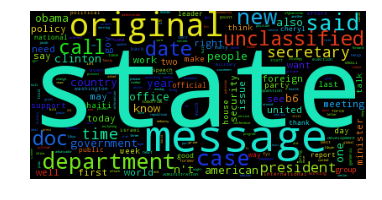

In [17]:
wc2 = WordCloud().generate(' '.join(w))

plt.imshow(wc2)
plt.axis("off")
plt.show()

Indeed, the word cloud we obtain is a bit cleaner than it was with the raw data.

## Comparisons

The word clouds with pre-processing on the mails first is clearly superior in term of quality. The principal drawback of it being computationaly heavier to process.

Overall, it is probably interesting to create a word could on raw data initially as it gives a first insight on what's to be done to create a better could with adapted pre-processing on the data.